# Naive Bayes

Since our logistic regression model performed reasonably well, let's move on to something else and see if we can do better. In this notebook, we'll be building a [naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) model.

## Importing libraries

In [13]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

## Loading the data

In [2]:
filepath = '../data/clean_1587672956.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,subreddit,subreddit_subscribers,title,selftext,score,num_comments,author,created_utc
0,Christianity,233423,Christian and wondering if God provides what w...,"Please forgive me for sounding so flippant, bu...",1,0,friendlyhello123,1587672956
1,Christianity,233423,What do you think is often ignored in the bibl...,Like genealogies for example... both Rahab and...,1,0,Clear-Plastic,1587671298
2,Christianity,233422,How do you deal with some new member suddenly ...,Have this issue now. This member somehow becam...,1,0,akhil_gs,1587671035
3,Christianity,233423,"Ran Across a Great Podcast about Christianity,...","Hi all, \n\nI ran across this podcast where a ...",1,0,MrNewDenver,1587670810
4,Christianity,233423,Desire for wealth,Hi-\nI have been thinking about it a bit latel...,1,0,FloppingGazelle,1587670685


In [4]:
df.shape

(28735, 8)

## Train/test split

In [5]:
X = df['title']
y = df['subreddit'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Multinomial Naive Bayes

Because our features represent discrete word counts, the naive Bayes model we'll use is the *multinomial* naive Bayes model.

In [6]:
# Create pipeline with CountVectorizer and MultinomialNB
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

# Create paramater grid to search over
pipe_params = {
    'cvec__max_df': [0.4, 0.6, 0.8],
    'cvec__ngram_range': [(1, 1), (1, 2)],
}

In [7]:
# Create grid search with pipeline and paramaters
gs = GridSearchCV(pipe,
                  pipe_params,
                  cv=5)

# Fit on training data
gs.fit(X_train, y_train);

In [8]:
# See what parameters the grid search settled on
print(gs.best_params_)

{'cvec__max_df': 0.4, 'cvec__ngram_range': (1, 1)}


In [11]:
# View training score, test score, and baseline accuracy
print('Train score:', round(gs.score(X_train, y_train), 4))
print('Test score:', round(gs.score(X_test, y_test), 4))
print('Baseline accuracy:', round(y.value_counts(normalize=True)[0], 4))

Train score: 0.8282
Test score: 0.7483
Baseline accuracy: 0.5234


## What was our model most likely to get wrong?

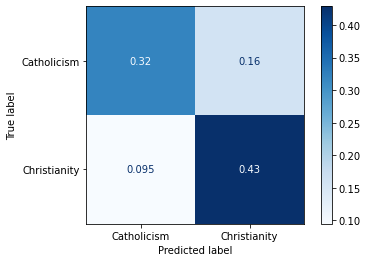

In [14]:
plot_confusion_matrix(gs.best_estimator_, X_test, y_test, normalize='all', cmap='Blues');

As with the logistic regression model, our naive Bayes model is more likely to misclassify */r/Catholicism* posts than */r/Christianity* posts.

## How do logistic regression and naive Bayes fare against one another?

Here is how each of our models performed:

|                   | Logistic Regression | Naive Bayes |
|-------------------|---------------------|-------------|
| Training score    | 0.8699              | 0.8282      |
| Test score     | 0.7487              | 0.7483      |
| Baseline accuracy | 0.5234              | 0.5234      |

The naive Bayes model has a fair bit more bias, but the test scores for both models are nearly identical. It may be the case that for this problem, a 75% test accuracy rate is something of an upper bound.